# 2020.04.26 머신러닝 알고리즘 스터디

## Connect to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. NMF(Non-negative matrix factorization, 비음수 행렬 분해)

- 유용한 특성을 뽑아내기 위한 비지도 학습 알고리즘 -> 차원 축소에도 사용 가능
- PCA: 데이터 분산이 가장 크고 수직인 성분
- NMF: 음수가 아닌 성분과 계수 값을 찾는다.
- 따라서 음수가 아닌 특성을 가진 데이터에만 적용
- 음수가 아닌 가중치 합으로 데이터를 분해하는 기능 -> 오디오 트랙, 음악 같은 데이터에 유용.
- 데이터의 특성을 분하여 차원을 촉소할 수 있다..

#### - NMF와 PCA의 다른점


(1) PCA <br>
- 데이터 분산이 가장 크고 수직인 성분을 찾음.
- 최대 분산 뱡향 -> 성분 간의 우열이 있음.

(2) NMF
- 음수가 아닌 성분과 계수 값을 찾음.
- 특성이 양수이기마 하면 성분의 우열을 나눌 수 없다.
- 데이터가 원점에서 상대적으로 어디에 놓여있는지가 중요하다.

![대체 텍스트](https://drive.google.com/uc?id=1iNAt6_riXv5RhziUl3sk0dYtzACCTcwf)

- W: 각 열은 데이터의 특성, 행은 특성에 대한 적합도(가중치) <br>
- H: 각 행은 특성, 각 열은 특성에 대한 중요도

### - 예제 코드

In [0]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=6cb35f95e1f0bdebe5a1a20d22189cd2929e726eb75861d14d21368bf46342a0
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
# library import

import mglearn

import matplotlib

import matplotlib.pyplot as plt



# matplotlib 설정

plt.rcParams['axes.unicode_minus'] = False # 축- 설정

matplotlib.rc('font', family='AppleGothic') # 한글출력



# 예제 데이터

mglearn.plots.plot_nmf_illustration()

plt.show() # 그래프 출력

ModuleNotFoundError: ignored

## 2. PCA(Principal Component Analysis, 주성분 분석)

### - 차원의 저주

![대체 텍스트](https://drive.google.com/uc?id=1EPOD9_XCHTTZRNGVvX2XcDF_T3tVgasp)

- 데이터의 차원 증가 -> 데이터 공간의 부피가 기하 급수적으로 증가.
- 따라서 데이터의 밀도는 차원이 증가할수록 희소(sparse)해짐.
- 또한 데이터가 증가할수록 데이터 포인트 간의 거리 증가.
- 이러한 데이터로 학습시 overfitting 위험이 커진다.

### - 차원 축소의 필요성

- 높은 차원이 가지는 문제점 해결
- 특징벡터를 효과적으로 다룬다 -> 불필요 요소, 노이즈 제거
- 2,3차원으로 시각화 가능

### - 차원 축소를 위한 접근 방법

#### (1) 투영

- 일반적으로 대부분의 실제 데이터: 모든 데이터의 특성, 즉 차원이 고르게 분포되어 있지 않다.
- 고차원의 데이터 특성 중 일부 특성으로 데이터를 표현할 수 있다.


![대체 텍스트](https://drive.google.com/uc?id=17HSsLpTKLIqqyHMRcNIqhrUJKiARnXkJ)

### - PCA : 대표적인 차원 축소 알고리즘

- 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다.
- 가장 가까운 초평면: 분산을 최대한 보존하는 축
- 결국, 분산을 최대한 보존하면서 서로 직교하는 새 기저(축)을 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법.
- 서로 직교하는 새 기저로 데이터를 변환 -> 변수 간 상관관계가 높은 데이터에 효과가 좋다.

![대체 텍스트](https://imgur.com/Uv2dlsH.png)

#### - PCA의 절차

(1) 기존 데이터 X의 공분산행렬 구하기 <br>
(2) 공분산행렬의 고유값과 고유벡터 계산 <br>
(3) 고유값의 크기 순서대로 고유벡터 나열 <br>
(4) 정렬된 고유벡터 가운데 일부 선택 <br>
(5) 해당 고유벡터와 X 내적

#### (1) 공분산(covariance) 구하기

공분산(covariance): 2개의 특성(변수) 간의 상관정도 <br><br>
![대체 텍스트](https://drive.google.com/uc?id=1ntYjkHdqXWO2RBlNoTiV09L4MTje1fzg)

![대체 텍스트](https://drive.google.com/uc?id=1m9FLfizKcc1lz8rdlAhMLDXvTQxnGL7h)

#### - PCA 예제

![대체 텍스트](https://drive.google.com/uc?id=1CWGFJ1z50J7kmk81vOvVPjnWQowx1ZQI)
![대체 텍스트](https://drive.google.com/uc?id=1bEt1CWD2Oor12EA-d3HDYB1hXppJ6aUk)
![대체 텍스트](https://drive.google.com/uc?id=1DvBa59BR3njBZMg7Do5eRu7wRtMsG2Rq)
![대체 텍스트](https://drive.google.com/uc?id=1rlf0iAnOltJyHwd9LGLl8ZVwXR8GWofJ)

### - 예제 코드: 미국, 일본, 유럽, 한국의 20년간 주가

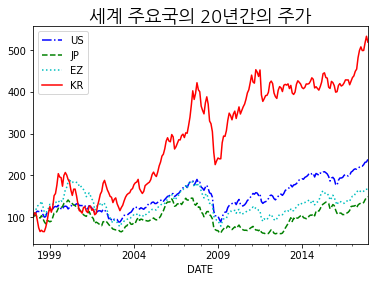

<Figure size 1080x864 with 0 Axes>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

# code of each countries
symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]


data = pd.DataFrame()
# crawl the data
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

# define the font
font_location = './gdrive/My Drive/Colab Notebooks/2020_1_data/04.dacon_corona/font/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location, size=18)
#plt.rc('font', family=font_name)

# plot the data
styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가", fontproperties=font_name)
plt.figure(figsize=(15,12))
plt.show()


- 연간 주식수익률 데이터

In [0]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


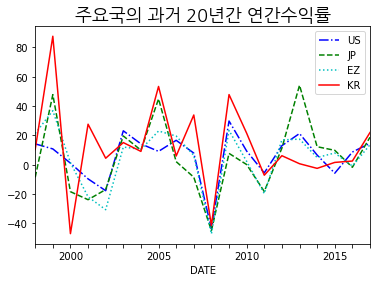

In [0]:
font_location = './gdrive/My Drive/Colab Notebooks/2020_1_data/04.dacon_corona/font/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location, size=18)

df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률", font_properties=font_name)
plt.xticks(df.columns)
plt.show()

- PCA 분석을 통해 모든 나라의 주가 움직임 기저에 깔려있는 성분을 살펴보자.

In [0]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

# 세계주가의 공통요인: 평균값
m = pca2.mean_

# 나라별로 주가를 다르게 하는 요인: 주성분
p1 = pca2.components_[0]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

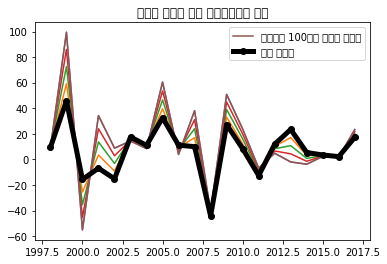

In [0]:
import numpy as np

xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)

font_location = './gdrive/My Drive/Colab Notebooks/2020_1_data/04.dacon_corona/font/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

- 나라별 주성분 기준

In [0]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


### - PCA의 한계

(1) PCA는 단순히 변환된 축이 최대 분산 방향과 정렬 되도록 좌표회전을 수행 -> 최대 분산방향이 특징 구분을 좋게 한다는 보장이 없다. <br>
(2) 비선형인 패턴에는 적용하기가 곤란하다. <br>

![대체 텍스트](https://drive.google.com/uc?id=1WydV4hK9Bm-H8WXVkv6hBeLbBCtS61-R)

- Reference <br>
https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/ <br>
https://excelsior-cjh.tistory.com/167 <br>

## 3. 커널 PCA

- PCA, LDA 알고리즘: 차원축소를 위한 선형 변환 기법을 적용 -> 선형 분리 불가능한 데이터에 대해서는 적당하지 않다. 
- PCA에 기존의 kernel trick 적용

![대체 텍스트](https://drive.google.com/uc?id=12ddFD3ytvkzK1zXzLqMVZKdHq11VcYpQ)

### - 장점

(1) 두 데이터의 상관 관계를 우리가 정한 kernel function을 통해 나타낼 수 있다. -> 성능 향상 <br>
(2) 기존의 linear projection이 nonlinear한 projection으로 바뀌게 된다.

### - 예제 코드

#### - 반달 모양 데이터들 분리

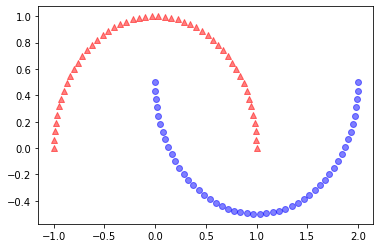

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker ='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker ='o', alpha=0.5)
plt.show()

표준 PCA를 통해 주성분에 투영.

AttributeError: ignored

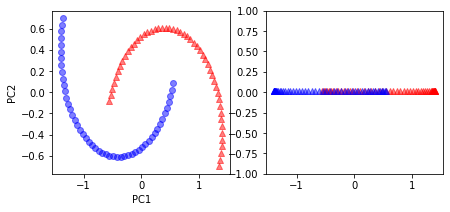

In [0]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))+0.02, color='blue', marker='^', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_ytricks([])
ax[1].set_xlabel('PC1')

plt.show()


선형 분류기가 표준 PCA를 사용해 변환된 데이터에 대해 기능을 잘 하지 못한다.


#### sklearn의 kernel PCA

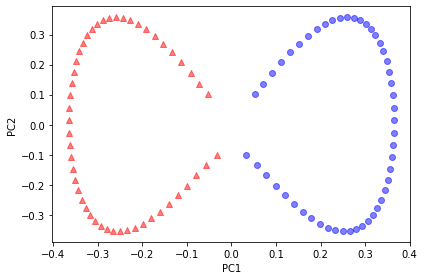

In [0]:
from sklearn.decomposition import KernelPCA
from sklearn import *

X, y = sklearn.datasets.make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('./figures/scikit_kpca.png', dpi=300)
plt.show()

* Reference <br>
https://enginius.tistory.com/385 <br>
http://www.datamarket.kr/xe/index.php?mid=board_oFxn34&document_srl=26649&listStyle=viewer

## 4. LLE(지역적 선형 임베딩)